<a href="https://colab.research.google.com/github/stefymojica/MACC/blob/main/taller5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install mesa --quiet
import mesa
print(mesa.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 4.8 MB/s eta 0:00:00
3.3.0


In [22]:
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from mesa import Agent, Model
from mesa.space import MultiGrid
from mesa.space import ContinuousSpace
import math

In [29]:
# 1. Definición del agente
class ContinuousWalker(Agent):
    def __init__(self, model):
        super().__init__( model)
        self.x = model.space.width / 2
        self.y = model.space.height / 2
        self.theta = random.uniform(0,2*math.pi)


    def move(self):
      delta_theta = random.uniform(-math.pi/3, math.pi/3)
      self.theta += delta_theta

      r = random.uniform(0.3,0.8)
      dx = r * math.cos(self.theta)
      dy = r * math.sin(self.theta)

      self.x += dx
      self.y += dy

      ϵ = 1e-8
      self.x = max(ϵ, min(self.x, self.model.space.width - ϵ))
      self.y = max(ϵ, min(self.y, self.model.space.height - ϵ))

      self.model.space.move_agent(self, (self.x, self.y))

# 2. Definición del modelo
class ContinuosWalkerModel(Model):
    def __init__(self, width, height, num_steps):
        super().__init__()
        self.num_agents = 1
        self.space = ContinuousSpace(width, height, torus = False)
        self.num_steps = num_steps

        agent = ContinuousWalker( model=self)
        self.agents.add(agent)
        self.space.place_agent(agent, (agent.x, agent.y))

    def step(self):
        self.agents.shuffle_do("move")

### Trayectoria del Insecto

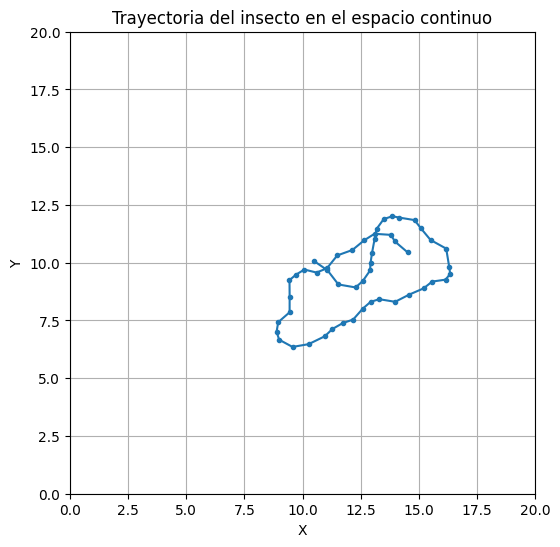

In [31]:
num_steps = 50
model = ContinuosWalkerModel(20, 20, num_steps)

positions = []
for _ in range(num_steps):
    model.step()
    agent = list(model.agents)[0]
    positions.append((agent.x, agent.y))

x_coords, y_coords = zip(*positions)

plt.figure(figsize=(6, 6))
plt.plot(x_coords, y_coords, '-o', markersize=3)
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.grid(True)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Trayectoria del insecto en el espacio continuo")
plt.show()

### Trayectoria en Animacion

In [32]:
# Configurar la figura
fig, ax = plt.subplots()
line, = ax.plot([], [], marker="o", color="b", markersize=10)
trail_line, = ax.plot([], [], color="lightgray", alpha=0.5)
ax.set_xlim(0, model.space.width)
ax.set_ylim(0, model.space.height)
ax.set_title("Caminata Aleatoria: 1 agente", color = "orange", fontweight= "bold", size =15)

def init():
    line.set_data([], [])
    trail_line.set_data([], [])
    return line, trail_line

def animatepunto(i):
    if i < len(x_coords):
        trail_line.set_data(x_coords[:i+1], y_coords[:i+1])
        line.set_data([x_coords[i]], [y_coords[i]])
    return line, trail_line

animation = FuncAnimation(fig, animatepunto, init_func=init,
                     frames=num_steps +1, interval=500)
plt.close(fig)
HTML(animation.to_html5_video())